$$
-\nabla(k\nabla T) = 0
$$
<br><br>
Condições de contorno:
$$
\begin{cases}
\frac{\partial T}{\partial y}(x,0) = 0\\
T(0,y) = Tleft\\
\frac{\partial T}{\partial y}(1,1)= 0\\
T(1,y) = Tright\\
\end{cases}
$$

$$
-\frac{\partial}{\partial x}(k\frac{\partial T}{\partial x})-\frac{\partial}{\partial y}(k\frac{\partial T}{\partial y}) = 0\\
$$
Discretizando <br>

$$
\frac{k_{i+\frac{1}{2},j}\left(\frac{T_{i+1,j} - T_{i,j}}{h_x}\right) - k_{i-\frac{1}{2}}\left(\frac{T_{i,j} - T_{i-1,j}}{h_x}\right)}{h_x} + \frac{k_{i+\frac{1}{2},j}\left(\frac{T_{i,j+1} - T_{i,j}}{h_y}\right) - k_{i-\frac{1}{2}}\left(\frac{T_{i,j} - T_{i,j-1}}{h_y}\right)}{h_y} = 0
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def f(x,y):
    return 0

def k(x,y):
    return 410


def solver_heat(f, Nx, Ny, cont):
    A = []
    b = np.zeros(Nx*Ny)
    hx = 1/(Nx - 1)
    hy = 1/(Ny + 1)
    xs = [0]*Nx
    ys = [0]*Ny
    xs[0] = 0
    ys[0] = hy
    print(Nx*Ny)
    for n in range(0,Nx*Ny):
        j = n//Nx +1
        i = n-Nx*(j-1)
        print(f'{i} - {j}')
        a = np.zeros(Nx*Ny)
        a[n] = 1/hx * (k(xs[i-1], 0))
        b[n] = 0
        
        ## Definindo os passos
        ys[j-1] = j*hy
        xs[i-1] = (i-1)*hx
        y_half = ys[j-1] + hy/2
        x_half = xs[i-1] + hx/2
        
        if i == 1:
            b[n] += cont[1]
        else:
            a[n-1] = -1
        
        if i == Nx:
            b[n] += cont[3]
        else:
            a[n] = -1
        
        if j == 1:
            b[n] += cont[2]
        else:
            a[n-Nx] = -1
        
        if j == Ny:
            b[n] += cont[0]
        else:
            a[n+Ny] = -1
        A.append(a)
    ys = np.linalg.solve(A,b)
    M = []
    for i in range(0,Nx*Ny,Nx):
        m = ys[i:i+Nx]
        M.append(m)
    return M, ys

In [38]:
ys = solver_heat(f, 4, 4, [0,500,0,293])

16
0 - 1
1 - 1
2 - 1
3 - 1
0 - 2
1 - 2
2 - 2
3 - 2
0 - 3
1 - 3
2 - 3
3 - 3
0 - 4
1 - 4
2 - 4
3 - 4


In [41]:
ys[1]

array([ 2.50000000e+03, -5.00000000e+02,  1.00000000e+03, -2.50000000e+03,
       -2.27373675e-13,  5.68434189e-14, -5.00000000e+02,  1.50000000e+03,
       -0.00000000e+00, -5.68434189e-14, -5.00000000e+02,  1.50000000e+03,
       -1.50000000e+03, -5.00000000e+02,  1.00000000e+03, -2.50000000e+03])

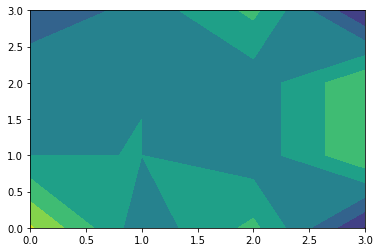

In [44]:
plt.contourf(ys[0])